In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np 
%matplotlib inline

In [2]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [3]:
X

array([[ -3.58693956,  -2.00759322],
       [ -8.92691497,   0.59593241],
       [-10.05817884,   2.63781159],
       ...,
       [ -8.88475483,   1.72810645],
       [ -9.9418876 ,   2.34981229],
       [ -1.0755027 ,  -1.78621   ]])

In [4]:
y

array([2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 0,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0,
       0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 0,
       0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2,
       1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 1, 1,
       2, 0, 2, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1,
       1, 0, 0, 1, 1, 0, 2, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 0, 1,
       2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0,
       1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0,

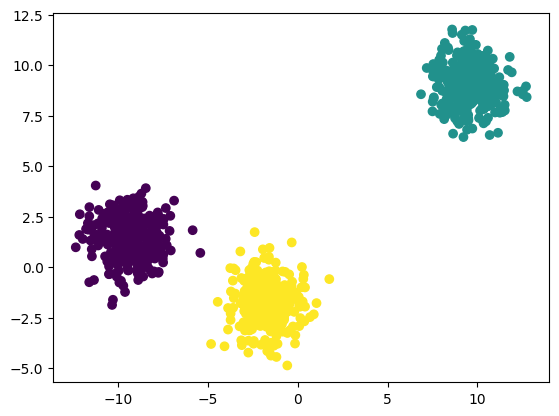

In [5]:
plt.scatter(X[:,0],X[:,1], c=y)

In [6]:
## Perform standardization --- feature scaling technique 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans

In [12]:
## Elbow Method to select the K value 

wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

In [13]:
wcss

[1340.0000000000005,
 210.71353173442057,
 43.69723086144161,
 36.35106151268672,
 29.61186693640155,
 23.484219385052906,
 21.242430831538307,
 19.167752457497556,
 17.236185004905103,
 15.729040613213229]

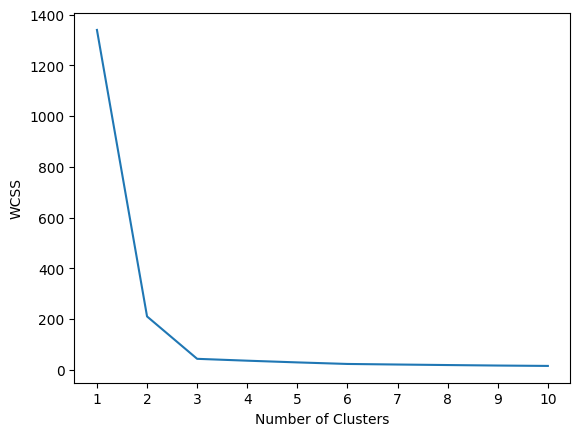

In [14]:
## plot elbow curve 

plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [16]:
kmeans.fit_predict(X_train_scaled)

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2,
       0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2,
       0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0,
       2, 1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2,
       2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 1,
       0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0,
       1, 2, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 0, 0, 2, 1, 2, 1, 1, 0,
       1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       1, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1,
       1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2,

In [17]:
y_pred = kmeans.predict(X_test_scaled)

In [18]:
y_pred

array([0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1,
       2, 0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0, 0, 2, 0, 0, 2,
       1, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1,
       0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0,
       1, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 2, 0, 2, 1,
       1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1,
       2, 0, 1, 0, 2, 1, 1, 2, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 0, 0, 2,
       1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 0,
       1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2,
       2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1,
       0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 1,
       2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2,
       2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0,

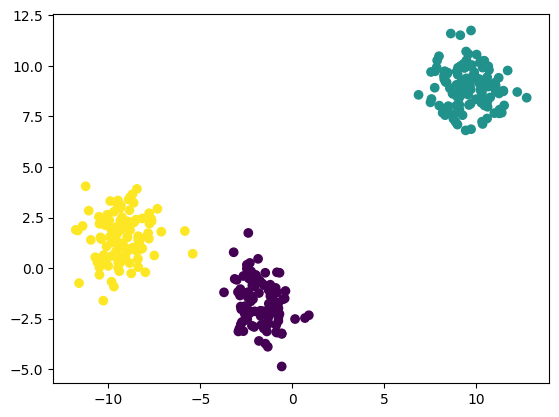

In [20]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [21]:
## Validating the k value
 

# Knee Locator 
# Silhoutee Scoring   

In [22]:
# Knee Locator 

!pip install kneed

In [24]:
from kneed import KneeLocator

In [27]:
kl = KneeLocator(range(1,11),wcss, curve="convex",direction="decreasing")

In [28]:
kl.elbow

3

In [29]:
## Silhoutte Scoring 

from sklearn.metrics import silhouette_score

In [30]:
silhoutte_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhoutte_coefficients.append(score)

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

In [31]:
silhoutte_coefficients

[0.7783660346382686,
 0.7865743560059058,
 0.6589787820751737,
 0.5540405985252636,
 0.3911325237274843,
 0.3739736283019701,
 0.3573409019503361,
 0.34621296952952085,
 0.32905631731350254]

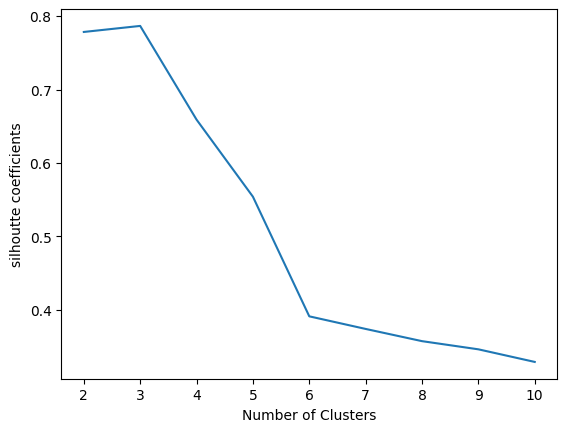

In [32]:
## plotting Silhoutte Score 

plt.plot(range(2,11),silhoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhoutte coefficients")
plt.show()